In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import numpy as np

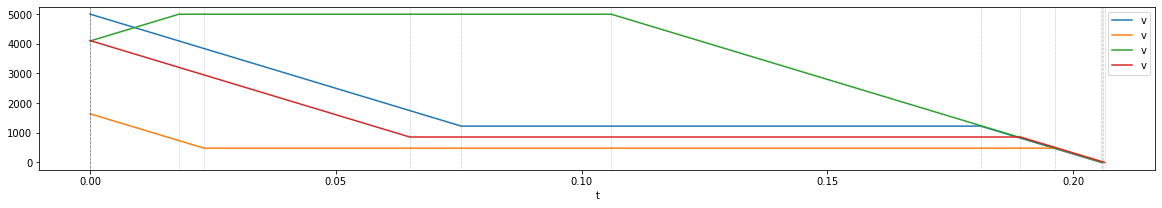

In [2]:
# Failed to converge in planning due to small segments. added halving
# v_0 when block is too long post-planning to fix. 
from trajectory.planner import Segment, Joint

j = Joint(5_000, 50_000)

block_params = [
 (379, 4998, 0),
 (110, 3277, 0),
 (771, 4092, 0),
 (275, 4107, 0)]

blocks = [j.new_block(*bp) for bp in block_params]
s = Segment(0,blocks).init()
s.plan()
s.plot()

In [3]:
for dt in np.linspace(1.01, 2, num=10):
    b =j.new_block(10,500,0).init()
    nt = b.t*dt
    b.plan(nt)
    print(f"{(b.t-nt):+5.6f}", b.v_0, b.v_1)

-0.000152 500 0
-0.000621 500 0
+0.000136 500 0
-0.000190 250.0 0
-0.000257 500 0
-0.000180 250.0 0
+0.000029 125.0 0
-0.000838 125.0 0
-0.000217 500 0
-0.000725 250.0 0


/Users/eric/Documents/proj/trajectory/trajectory/plot.py:32: UserWarning: Discontinuty 0/0d@1737.86 -> 1/0a@868.93
  warn(f"Discontinuty {a}@{last_row.v_f} -> {b}@{r.v_i}")
/Users/eric/Documents/proj/trajectory/trajectory/plot.py:32: UserWarning: Discontinuty 0/1d@772.26 -> 1/1a@386.13
  warn(f"Discontinuty {a}@{last_row.v_f} -> {b}@{r.v_i}")


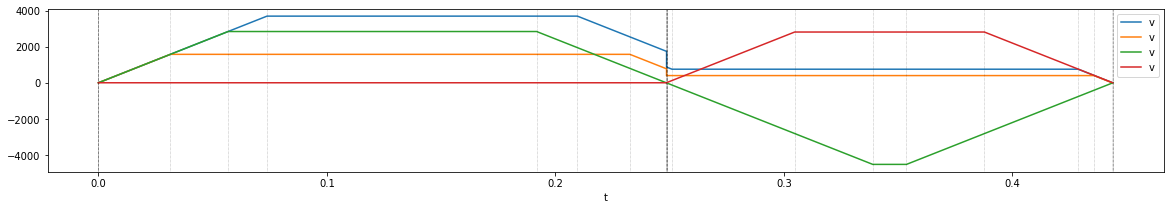

In [4]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)   

sl.rmove([743, 360, 544, 0])
sl.rmove([141, 76, -475, 391])


sl.plot()

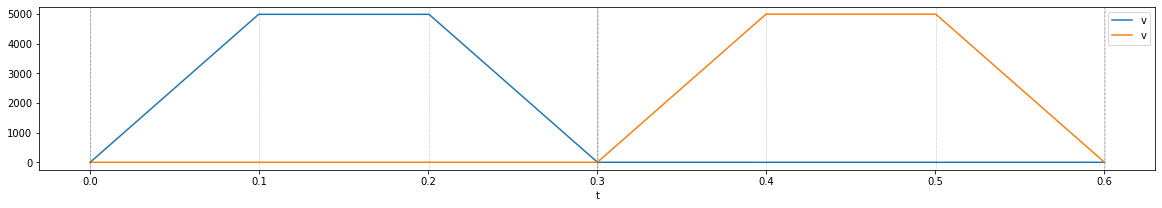

In [5]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.rmove([1000,1])
s = sl.rmove([1,1000])


sl.plot()

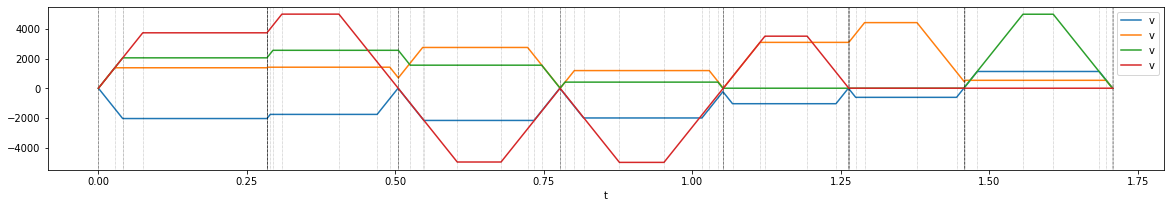

In [6]:
# Too many planning updates for sid=1.
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.rmove([-538, 372, 539, 920])
sl.rmove([-359, 308, 562, 838])
sl.rmove([-497, 631, 409, -861])
sl.rmove([-479, 298, 109, -874])
sl.rmove([-203, 557, 0, 495])
sl.rmove([-112, 683, 0, 0])
sl.rmove([257, 130, 751, 0])

sl.plot()

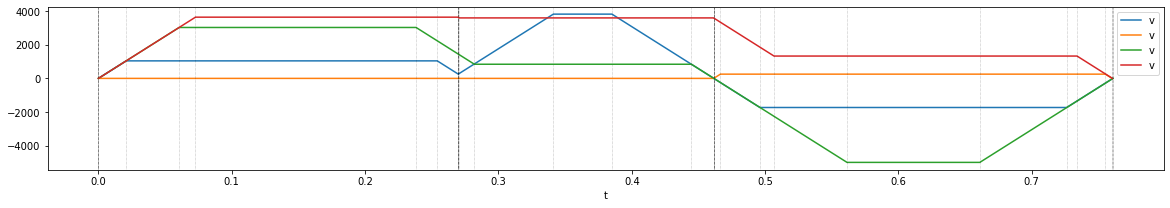

In [7]:
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints) 

sl.rmove([264, 0, 700, 849])
sl.rmove([459, 0, 158, 689])
sl.rmove([-458, 74, -996, 431])

sl.plot()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


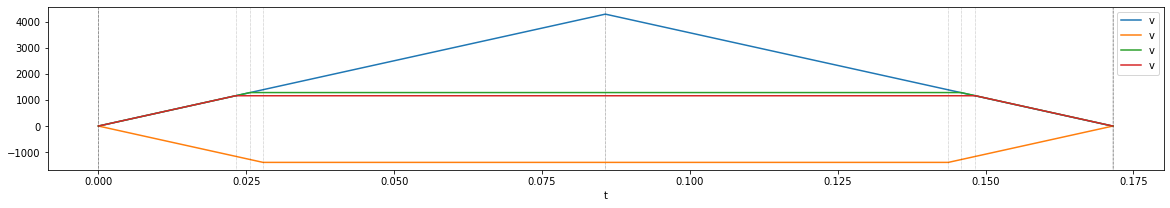

In [8]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)


sl.rmove([367, -200, 187, 172])

sl.plot()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


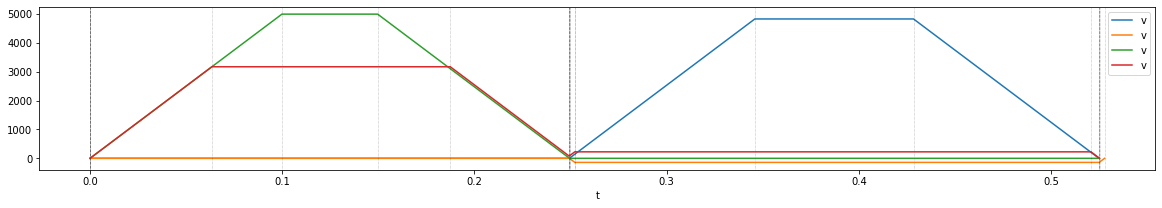

In [9]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)



sl.rmove([0, 0, 747, 594])
sl.rmove([864, -39, 0, 61])


sl.plot()

In [10]:
# Negative t_c after planning ramp
(tf, x, v_0, v_1) = 1.01, 500,1000,1000
j = Joint(5_000, 50_000)
self = b = j.new_block(x, v_0, v_1).init()
b.plan_ramp(b.t)
print(b)

Block(x=500, t=0.16400000000000003, t_a=0.04799999999999998, t_c=0.11600000000000006, t_d=0.0, x_a=105.59999999999994, x_c=394.4000000000001, x_d=0, v_0=1000, v_c=3399.999999999999, v_1=3399.999999999999, d=1, min_t=0, joint=Joint(v_max=5000, a_max=50000, small_x=500.0), segment=None, next=None, prior=None, flag='PR', recalcs=0)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot:xlabel='v_c'>

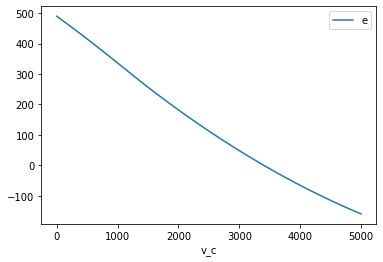

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import accel_xt, binary_search
import pandas as pd 

def err(v_c):
    x_a, t_a = accel_xt(self.v_0, v_c, self.joint.a_max)
    t_c = self.t - t_a

    x_c = v_c * t_c
    x_err = self.x - (x_a + x_c)

    return x_err

df = pd.DataFrame([{'v_c': v_c, 'e':err(v_c)} for v_c in range(0, 5_000)]).set_index('v_c')
df.plot()

Block(x=499, t=0.1497904321924997, t_a=0.0999898381117599, t_c=0.04980059408073982, t_d=0.0, x_a=249.99801630353934, x_c=249.00198369646066, x_d=0, v_0=0.48828125, v_c=4999.9801868379955, v_1=4999.9801868379955, d=1, min_t=0, joint=Joint(v_max=5000, a_max=50000, small_x=500.0), segment=None, next=None, prior=None, flag='PR', recalcs=0)


<AxesSubplot:xlabel='t'>

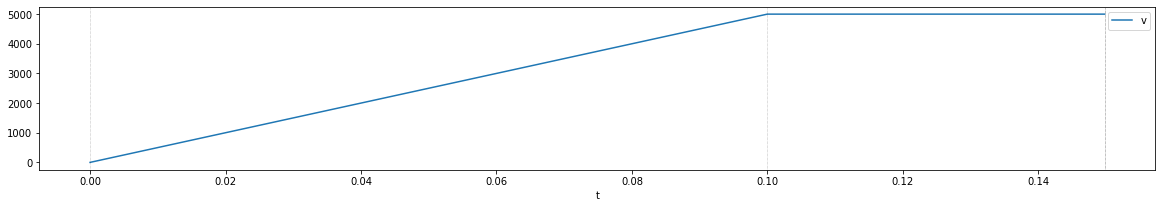

In [12]:
# Math domain error in planning ramp. 
# x=502 fails, but x=503 succeedes, as does 499
from trajectory.plot import * 
(x, v_0, v_1, tf) = 499, 2000, 4500, 1.01
j = Joint(5_000, 50_000)
b = j.new_block(x, v_0, v_1).init()
t = b.t
b.plan(t * tf)
b.plan_ramp(t*tf)
print(b)
plot_params(b)

<AxesSubplot:xlabel='v_c'>

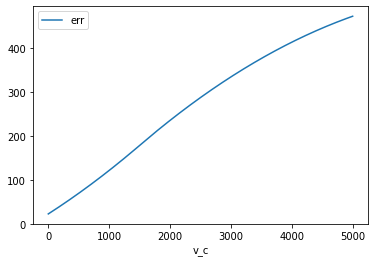

In [13]:
(x, v_0, v_1, tf) = 490, 1500, 4500, 1.01
self = b = j.new_block(x, v_0, v_1).init()

def err(v_c):
    x_a, t_a = accel_xt(self.v_0, v_c, self.joint.a_max)
    t_c = self.t - t_a

    x_c = v_c * t_c
    
    x_err = (x_a + x_c)

    return x_err

df = pd.DataFrame([{'v_c': v_c, 'err':err(v_c)} for v_c in range(0, 5_000)]).set_index('v_c')
df.plot()

In [14]:

from trajectory.planner import  *
from trajectory.plot import * 

j = Joint(5_000, 50_000)

(x, v_0, v_1, tf) = 10, 50, 1000, 1.01
self = b = j.new_block(x, v_0, v_1).init()
t = b.t
print(t*tf)
b.plan_ramp(t)
print(b)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.019215265801007443
Block(x=10, t=0.018989638180749936, t_a=0.018989638180749936, t_c=0.0, t_d=0.0, x_a=9.96464086493239, x_c=0, x_d=0, v_0=50, v_c=999.4819090374968, v_1=999.4819090374968, d=1, min_t=0, joint=Joint(v_max=5000, a_max=50000, small_x=500.0), segment=None, next=None, prior=None, flag='PR', recalcs=0)


In [15]:

from trajectory.planner import  *
from trajectory.plot import * 

j = Joint(5_000, 50_000)
(x, v_0, v_1, tf) =  11,0,1000,1.01

b = j.new_block(x, v_0, v_1).init()
t = b.t
b.plan(t * tf)
b.plan_ramp(t*tf)
print(b)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Block(x=11, t=0.021197681094476777, t_a=0.01814126427356734, t_c=0.0030564168209094374, t_d=0.0, x_a=8.227636736085268, x_c=2.772363263914732, x_d=0, v_0=0, v_c=907.063213678367, v_1=907.063213678367, d=1, min_t=0, joint=Joint(v_max=5000, a_max=50000, small_x=500.0), segment=None, next=None, prior=None, flag='PR', recalcs=0)
